# Symbolic Computing Notebook
This notebook contains cells for manipulating and inspecting symbolic math equations. 

This notebook was created and tested using the following packages and versions:
* Python 3.6.1
* IPython 5.3.0
* Jupyter Notebook 5.0.0
* Matplotlib 2.0.2
* NumpPy 1.12.1
* IPyWidgets 6.0.0
* SymPy 1.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from sympy import *
init_printing()
%matplotlib inline

In [2]:
def doEval(expr, a_, b_, c_):
    ex = expr.subs(a, a_).subs(b, b_).subs(c, c_)
    x = symbols('x')
    f = lambdify(x, ex)
    x = np.linspace(-5, 5, 100)
    y = f(x)
    plt.plot(x, y)
    plt.ylabel(ex)

In [3]:
var('x a b c')

In [4]:
eval_expr = a * x ** 2 + b * x + c
eval_expr

### Function Explorer
* The following cell examines the effects of the different variables in a function
* The expresion shown in the previous cell is examined

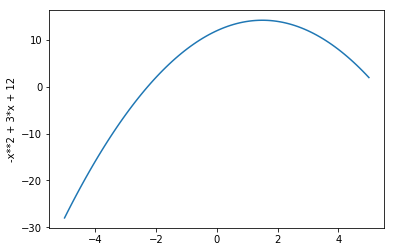

In [5]:
global eval_a
global eval_b
global eval_c
eval_a = 1
eval_b = 1
eval_c = 1
doEval(eval_expr, eval_a, eval_b, eval_c)

a_is = widgets.IntSlider(value=1, min=-10, max=10, description="a", continuous_update=False)
b_is = widgets.IntSlider(value=1, min=-10, max=10, description="b", continuous_update=False)
c_is = widgets.IntSlider(value=1, min=-50, max=50, description="c", continuous_update=False)

def a_is_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global eval_a
        global eval_b
        global eval_c
        clear_output()
        eval_a = change['new']
        doEval(eval_expr, eval_a, eval_b, eval_c)
        
def b_is_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global eval_a
        global eval_b
        global eval_c
        clear_output()
        eval_b = change['new']
        doEval(eval_expr, eval_a, eval_b, eval_c)
        
def c_is_on_change(change):    
    if change['type'] == 'change' and change['name'] == 'value':
        global eval_a
        global eval_b
        global eval_c
        clear_output()
        eval_c = change['new']
        doEval(eval_expr, eval_a, eval_b, eval_c)
                
a_is.observe(a_is_on_change)  
b_is.observe(b_is_on_change)
c_is.observe(c_is_on_change)
expr_controls = widgets.HBox([a_is, b_is, c_is])
display(expr_controls)


### Symbolic Solving
* The expression from the previous cell can be solved using the following cells

In [6]:
expr = eval_a * x**2 + eval_b * x + eval_c
expr

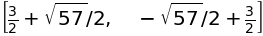

In [7]:
x = Symbol('x')
solve(expr, x)

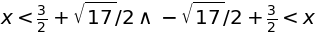

In [8]:
solve_univariate_inequality(expr > 10, x)

### Calculus
* The following cells can be used to perform different calculus operations on the expression from the symbolic solving cell

In [9]:
diff(expr, x)

In [10]:
limit(expr, x, -oo)

In [11]:
integrate(expr, x)

### Matrix Solving
* The next cells show an example of solving systems of equations with matrices in SymPy

In [12]:
var('a b c d u v')

In [13]:
M = Matrix([[a, b, u], [c, d, v]])
M

⎡a  b  u⎤
⎢       ⎥
⎣c  d  v⎦

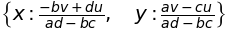

In [14]:
x = Symbol('x')
y = Symbol('y')
s = solve_linear_system(M, x, y)
s

In [15]:
det(M[:2, :2])

### Boolean Logic
* The next cells examine boolean logic using SymPy

In [16]:
var('x y z')

In [17]:
P = x & y | ~z
P

In [18]:
def print_truth_table(P):
    symbols = []
    for var in P.free_symbols:
        symbols.append(var)  

    html = '<table><tr>' 
    for i in range(len(symbols)-1, -1, -1):
        html += '<td>' + str(symbols[i]) + '</td>'
    html += '<td>output</td></tr>'

    values = []
    inputs = {}
    for i in range(2**len(symbols)-1, -1, -1):
        values.clear()
        inputs.clear()
        for j in range(len(symbols)-1, -1, -1):
            k = 2 ** j
            r = (i & k) >> j
            values.append(bool(r))
            inputs[symbols[j]]=bool(r)    

        html += '<tr>'
        for value in values:
            html += '<td>' + str(value) + '</td>'
        html += '<td>' + str(P.subs(inputs)) + '</td></tr>'
    
    html += '</table>'    
    return HTML(html)

In [19]:
print_truth_table(P)

In [20]:
minterms = [[1,1,1], [1,1,0], [1,0,0], [0,1,0], [0,0,0]]

In [21]:
Q = SOPform(['y', 'x', 'z'], minterms)
Q